In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets

import time

In [2]:
np.random.seed(0)
torch.manual_seed(0)
data = np.load('data_task1.npy') #load data
label=np.load('label_task1.npy') #load label

In [3]:
data_train, data_test, label_train, label_test = train_test_split(data,label,
    test_size=0.25, random_state=75)

In [4]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=20, out_features=40)
        self.fc2 = nn.Linear(in_features=40, out_features=36)
        self.fc3 = nn.Linear(in_features=36, out_features=32)
        self.fc4 = nn.Linear(in_features=32, out_features=28)
        self.fc5 = nn.Linear(in_features=28, out_features=24)
        self.fc6 = nn.Linear(in_features=24, out_features=12)
        #self.fc7 = nn.Linear(in_features=18, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))        
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        #x = F.relu(self.fc7(x))
        x = self.output(x)
        return x

In [5]:
data_train = torch.FloatTensor(data_train)
data_test = torch.FloatTensor(data_test)
label_train = torch.LongTensor(label_train)
label_test = torch.LongTensor(label_test)

model = ANN()
model

start_time = time.time()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#epochs = 1000
epochs = 800
loss_arr = []
train_loss = []
train_accuracy = []

In [6]:
for i in range(epochs):
    y_hat = model.forward(data_train)
    loss = criterion(y_hat, label_train)

    accuracy = len(np.where(label_train == y_hat.argmax(1))[0]) / len(label_train)
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())
 
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Epoch: 0 Loss: 1.1085407733917236
Epoch: 10 Loss: 1.0658690929412842
Epoch: 20 Loss: 1.0128717422485352
Epoch: 30 Loss: 0.9130376577377319
Epoch: 40 Loss: 0.7223935723304749
Epoch: 50 Loss: 0.5752881765365601
Epoch: 60 Loss: 0.4921470284461975
Epoch: 70 Loss: 0.42496606707572937
Epoch: 80 Loss: 0.3727893829345703
Epoch: 90 Loss: 0.3240499496459961
Epoch: 100 Loss: 0.2714206874370575
Epoch: 110 Loss: 0.22475700080394745
Epoch: 120 Loss: 0.18576563894748688
Epoch: 130 Loss: 0.19467413425445557
Epoch: 140 Loss: 0.14040429890155792
Epoch: 150 Loss: 0.11580237001180649
Epoch: 160 Loss: 0.09187842905521393
Epoch: 170 Loss: 0.06866156309843063
Epoch: 180 Loss: 0.050052352249622345
Epoch: 190 Loss: 0.03414338082075119
Epoch: 200 Loss: 0.02383921854197979
Epoch: 210 Loss: 0.017336517572402954
Epoch: 220 Loss: 0.012724614702165127
Epoch: 230 Loss: 0.009496897459030151
Epoch: 240 Loss: 0.0073506636545062065
Epoch: 250 Loss: 0.005925906356424093
Epoch: 260 Loss: 0.004361108411103487
Epoch: 270 Los

In [7]:
data_train = torch.FloatTensor(data_train)
data_test = torch.FloatTensor(data_test)
label_train = torch.LongTensor(label_train)
label_test = torch.LongTensor(label_test)

model = ANN()
model

start_time = time.time()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#epochs = 1000
epochs = 800
loss_arr = []
train_loss = []
train_accuracy = []

In [8]:
for i in range(epochs):
    y_hat = model.forward(data_train)
    loss = criterion(y_hat, label_train)

    accuracy = len(np.where(label_train == y_hat.argmax(1))[0]) / len(label_train)
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())
 
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
 
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Epoch: 0 Loss: 1.1237460374832153
Epoch: 10 Loss: 1.0754098892211914
Epoch: 20 Loss: 1.016074299812317
Epoch: 30 Loss: 0.9205095171928406
Epoch: 40 Loss: 0.7221850156784058
Epoch: 50 Loss: 0.5583047866821289
Epoch: 60 Loss: 0.44343462586402893
Epoch: 70 Loss: 0.3468063473701477
Epoch: 80 Loss: 0.2568676471710205
Epoch: 90 Loss: 0.18799763917922974
Epoch: 100 Loss: 0.15837709605693817
Epoch: 110 Loss: 0.10800842940807343
Epoch: 120 Loss: 0.07407242059707642
Epoch: 130 Loss: 0.04422571137547493
Epoch: 140 Loss: 0.030719930306077003
Epoch: 150 Loss: 0.020336324349045753
Epoch: 160 Loss: 0.01435951516032219
Epoch: 170 Loss: 0.010159865021705627
Epoch: 180 Loss: 0.007446614094078541
Epoch: 190 Loss: 0.005638077389448881
Epoch: 200 Loss: 0.004383695777505636
Epoch: 210 Loss: 0.003508354304358363
Epoch: 220 Loss: 0.002868437673896551
Epoch: 230 Loss: 0.0023772409185767174
Epoch: 240 Loss: 0.001997642684727907
Epoch: 250 Loss: 0.0017064246349036694
Epoch: 260 Loss: 0.0014777762116864324
Epoch:

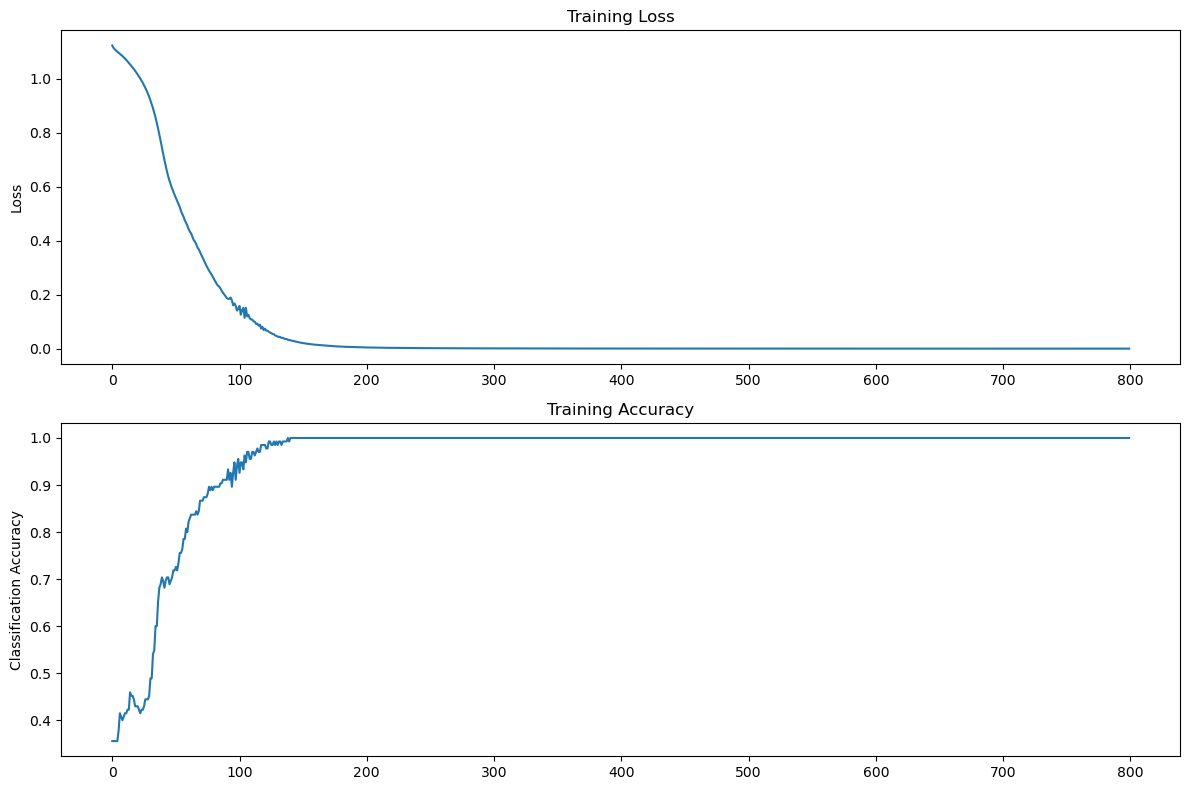

--- 78.6801643371582 seconds ---
Test Accuracy 0.73


In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

y_hat_test = model(data_test)
test_accuracy= len(np.where(label_test == y_hat_test.argmax(1))[0]) / len(label_test)
print("Test Accuracy {:.2f}".format(test_accuracy))

# Specify a path
PATH = "task1model.pt"

# Save
torch.save(model, PATH)